# **Jobs Analysis Project**

### **Overview**
This project presents a detailed exploratory data analysis (EDA) on a dataset of job postings. The aim is to uncover insights about job roles, required experience, salary trends, and geographic distribution to better understand current hiring patterns in the market.

### **Sample Data**
Here us a preview of 5 random rows from the dataset to understand its structure:

| Job Role                                   | Company                                   | Experience | Salary                    | Location                        | Rating | Posted On | Job Link                                                                                                                  |
|-------------------------------------------|-------------------------------------------|------------|---------------------------|----------------------------------|--------|------------|---------------------------------------------------------------------------------------------------------------------------|
| Business Sales Manager - Banca            | Lavya Associates                          | 5-10 Yrs   | 6,00,000 - 8,00,000 PA.   | Jorhat                           | -      | 6 Days Ago | [Link](https://www.naukri.com/job-listings-business-sales-manager-banca-life-insurance-jorhat-lavya-associates-6-days-ago-151122603989) |
| HR Manager 1                               | Emerald Paper Products                     | 2-7 Yrs    | 1,75,000 - 2,50,000 PA.   | Hybrid - Mohanlalganj           | -      | 9 Days Ago | [Link](https://www.naukri.com/job-listings-hr-manager-1-emerald-paper-products-9-days-ago-301222003554)                 |
| Executive- DevOps Engineer                | Rahi                                       | 3-8 Yrs    | Not disclosed             | Pune                             | -      | 5 Days Ago | [Link](https://www.naukri.com/job-listings-executive-devops-engineer-rahi-5-days-ago-201235001085)                      |
| Operation Executive (Females Only)        | Eduworld Bangalore Educational Services   | 1-6 Yrs    | 1,25,000 - 2,50,000 PA.   | Trivandrum/Thiruvananthapuram   | -      | 3 Days Ago | [Link](https://www.naukri.com/job-listings-operation-executive-females-only-eduworld-bangalore-educational-services-3-days-ago-501230002198) |
| Product Owner - Arcadis Gen               | Arcadis Consulting India Pvt. Ltd         | 4-7 Yrs    | Not disclosed             | Noida, Mumbai                    | 4.2    | 1 Day Ago  | [Link](https://www.naukri.com/job-listings-product-owner-arcadis-gen-arcadis-consulting-india-pvt-ltd-1-day-ago-701235001457)              |


---

### **Objectives**
- Analyze job role demand, locations, and industries.
- Explore experience and salary trends.
- Identify hiring hotspots by geography.
- Clean and structure raw job data.
- Visualize key patterns and insights.
- Create a reusable EDA workflow.
- Prepare data for future ML applications.

---

### **Data Processing**
- Dropped irrelevant columns (e.g. links, timestamps).
- Removed duplicates and null values.
- Cleaned and standardized experience and salary fields.
- Split experience and salary ranges into numeric columns.
- Filtered out inconsistent or malformed entries.

---
### **Key Insights**
- **Top Job Roles**: Software Developer, Data Analyst, and Backend Engineer are the most frequently listed roles.
- **High-Demand Locations**: Bangalore, Hyderabad, and Pune dominate job listings, highlighting tech industry hubs.
- **Experience Trends**: Most jobs require **2–5 years** of experience, indicating strong demand for mid-level professionals.
- **Salary Patterns**: Roles with higher experience levels show a wider and higher salary range, suggesting clear compensation growth.
- **Data Quality**: Job postings vary in formatting; consistent data cleaning is essential for extracting reliable insights.

---
### **Visualizations**
- **Top Job Roles**  
  Bar plot showing the most frequent job titles.

- **Top Locations**  
  Bar plot highlighting cities with the highest job posting counts.

- **Experience Required Distribution**  
  Histogram or bar plot showing the distribution of required experience (in years).

- **Salary Distribution**  
  Histogram displaying the range of minimum and maximum salaries.

- **Experience vs. Salary**  
  Scatter plot illustrating the relationship between experience and salary range.

---
### **Technologies used**
- **Python: ** Data manipulation and processing.
- **Pandas: ** Efficient data handling.
- **Matplotlib and Seaborn: ** Clear, insightful visualizations.

---
### **Future Enhancements**
- Predictive modeling for salary estimations.
- Deeper regional analysis of job availability.
- Skill mapping refinement based on company-specific needs.
---

### **Authors**
- **Priya Singh**

### 0. Loading the Data

In [ ]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 17.66 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


In [62]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')

#### 1. Data Exploration

This helps in getting a quick overview of the structure and content of the data.

In [56]:
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


,job_id,rating
count,7.866700e+04,42948.000000
mean,1.255071e+11,3.940144
std,1.097464e+11,0.519211
min,1.012200e+10,1.000000
25%,4.012350e+10,3.700000
50%,6.012350e+10,4.000000
75%,2.610226e+11,4.200000
max,3.112229e+11,5.000000


###### 1.1. Checking null values
The dataset contains missing values across multiple columns.  
- Critical job details like `job_id`, `job_role`, `salary`, and `job_link` each have 480 missing entries.  
- `experience` and `location` have a larger number of missing values, with 1,749 and 1,706 respectively.  
- Columns like `rating` and `reviews` have the highest missing counts, each with 36,199 nulls, indicating these fields are often not provided.  

In [63]:
df.isnull().sum()

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
posted_on,480


###### 1.2. Checking duplicate values

In [64]:
df.columns

df.duplicated(subset='job_id').sum()

np.int64(6137)

##### 1.3. Remove unwanted data - posted_on, job_link, company_link

In [65]:
del df['posted_on'], df['job_link'], df['company_link']

### 2. Data Cleaning

##### 2.1. Dealing with null values

- Dropped rows with nulls in `job_id`, `resposibilities`, and `company`  
- Filled missing `experience` with `'5 - 10 Yrs'`  
- Filled missing `location` with `'Bangalore/Bengaluru'`  
- Filled missing `rating` with `0.0`  
- Filled missing `reviews` with `'No reviews'`

These steps ensure a cleaner and more consistent dataset for analysis.

In [66]:
df.isnull().sum()

df = df.dropna(subset = ['job_id', 'resposibilities', 'company'])

df['experience'] = df['experience'].fillna('5 - 10 Yrs')
df['location'] = df['location'].fillna('Bangalore/Bengaluru')
df['rating'] = df['rating'].fillna(0.0)
df['reviews'] = df['reviews'].fillna("No reviews")

##### 2.2. Dealing with duplicate values

- Removed duplicate rows based on the `job_id` column to ensure unique job listings.

In [67]:
df = df.drop_duplicates(subset = 'job_id')

###### 2.3. Change data type of Job id
- Converted `job_id` to integer and then back to string to standardize the format and remove any decimal points.


In [68]:
df['job_id'].astype('int').astype(str)

,job_id
0,70123006070
1,60123905908
2,60123905898
3,60123905897
4,60123008332
...,...
73762,20123002989
73763,20123002957
73764,231222003986
73765,171220001449


##### 2.4. Clean Experience Column

- Extracted `min_experience` and `max_experience` from the `experience` column by splitting the range.  
- Removed the original `experience` column after creating the new fields.

In [69]:
df['min_experience'] = df['experience'].str.replace('Yrs', '').str.split('-').str[0].str.strip()
df['max_experience'] = df['experience'].str.replace('Yrs', '').str.split('-').str[-1].str.strip()
del df['experience']

##### 2.5. Clean Salary Column
- Cleaned the `salary` column and extracted `min_salary` and `max_salary` by splitting the range.  
- Filtered out outliers like `'9.5 Cr and above'`, `'Less than 5000'`, and `'Less than 50000'`.  
- Removed the original `salary` and intermediate `clean_salary` columns after processing.




In [70]:
df['clean_salary'] = df['salary'].str.replace(' PA.', '').str.replace(',', '').str.split('-').str[0].str.strip()

df = df[(df['clean_salary'] != '9.5 Cr and above') & (df['clean_salary'] != 'Less than 5000') & (df['clean_salary'] != 'Less than 50000')]
df['min_salary'] = df['clean_salary'].str.split('(').str[0].str.strip()
del df['clean_salary']

df['clean_salary'] = df['salary'].str.replace(' PA.', '').str.replace(',', '').str.split('-').str[1].str.split('(').str[0].str.strip()
df = df[df['clean_salary'] != '9.5 Cr and above']
df['max_salary'] = df['clean_salary'].fillna('Not disclosed')
del df['clean_salary']

del df['salary']

##### 2.6. Clean Location Column
- Cleaned the `location` column by removing "(All Areas)", standardizing delimiters, and formatting text.  
- Created a new `clean_location` column containing a list of individual, cleaned location names.

In [71]:
df['clean_location'] = df['location'].str.replace(r'\(All Areas\)', '', regex=True).str.replace(',', '*').str.replace('/', '*').str.replace(' ', '').str.title().str.split('*')

##### 2.7. Clean Reviews column
- Removed the text "Reviews" and replaced "No reviews" with `0`.  
- Converted the `reviews` column to integer type for easier analysis.

In [72]:
df['clean_reviews'] = df['reviews'].str.replace('Reviews', '').str.replace('No reviews', '0').str.strip()
df['reviews'] = df['clean_reviews']

df['reviews'] = df['reviews'].astype('int')
del df['clean_reviews']

### 3. Data Analysis

###### 3.1. Overall Analysis

In [73]:
print('-'*50)
print('Total unique Jobs          : ', df['job_id'].nunique())
print('Total unique Companies     : ', df['company'].nunique())
print('-'*50)

--------------------------------------------------
Total unique Jobs          :  72967
Total unique Companies     :  15310
--------------------------------------------------


##### 3.2. Top 5 companies (Reviews)

In [74]:
df['rating_review_filter'] = (df['rating'] * 0.01) + (df['reviews']* 0.09)
df.groupby('company')['rating_review_filter'].min().sort_values(ascending=False).head()

,rating_review_filter
company,
Tata Consultancy Services (TCS),4514.709
Reliance Industries (RIL),3930.521
Hdfc Bank,3519.940
Icici Bank,3013.240
Accenture,2891.651


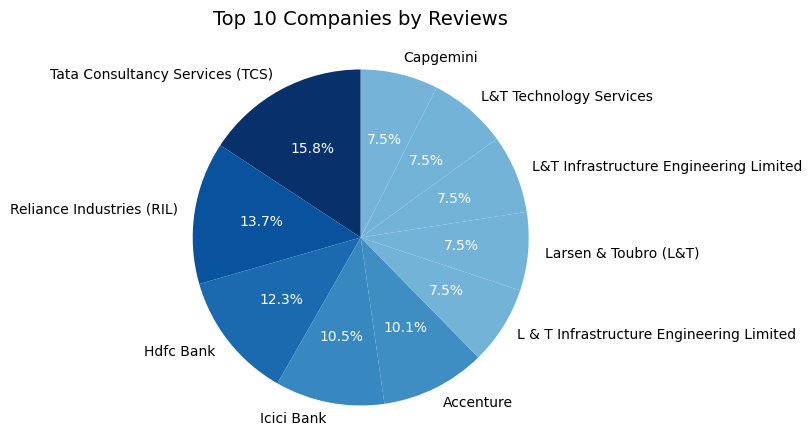

In [75]:
# Add this code cell after the data analysis section

import matplotlib.pyplot as plt

# Prepare data for the pie chart
company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)
labels = company_reviews.index
sizes = company_reviews.values

# Define a list of blues color shades
colors = plt.cm.Blues(sizes / max(sizes))

# Create the pie chart and get the wedges and texts
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Iterate through the percentage texts and set their color
for autotext in autotexts:
    autotext.set_color('white') # Set the color of the percentage text to white

# Iterate through the label texts and set their color
for text in texts:
    text.set_color('black') # Set the color of the label text to black (or white if preferred)

plt.title('Top 10 Companies by Reviews', fontsize=14, pad=20) # Added pad parameter
plt.show()

In [50]:
# Add this code cell after the data analysis section

import plotly.express as px

# Prepare data for the interactive pie chart
company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10).reset_index()
company_reviews.columns = ['company', 'reviews']

# Sort data by reviews in descending order to assign darker shades to higher values
company_reviews = company_reviews.sort_values(by='reviews', ascending=False)

# Create the interactive pie chart with Plotly and specify a blue color scale
fig = px.pie(company_reviews,
             values='reviews',
             names='company',
             title='Top 10 Companies by Reviews',
             color_discrete_sequence=px.colors.sequential.Blues) # Use sequential blue colors

fig.show()

In [ ]:
len(df[df['job_role'] == 'Data Analyst'])

59

##### 3.3. Skills needed for almost all the jobs

In [49]:
df['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

,count
resposibilities,
sales,5851
communication,3482
agency,3450
tied,3310
customer service,3276
training,3177
team handling,2617
javascript,2607
agency channel,2549


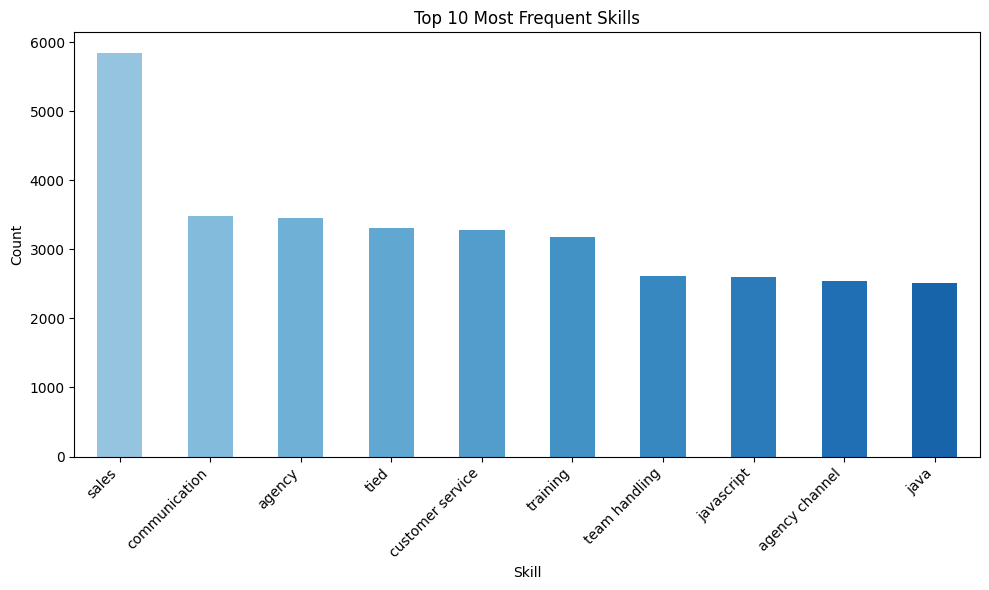

In [ ]:
# Add this code cell after the skills analysis section

import matplotlib.pyplot as plt
import numpy as np # Import numpy for color mapping

# Prepare data for the bar chart: Top 10 skills
top_skills = df['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

# Generate a list of blue shades using a colormap
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_skills))) # Generate shades from a colormap

# Create the bar chart with Matplotlib and specify a list of colors
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar', color=colors) # Use the 'colors' variable calculated with Matplotlib's colormap

plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 3.3. Skills needed to get hired at HDFC bank

In [45]:
df[df['company'] == 'Hdfc Bank']['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

,count
resposibilities,
portfolio management,8
cross selling,7
sales,6
relationship management,6
banking,5
customer service,4
casa,4
hni client handling,4
retail branch banking,4


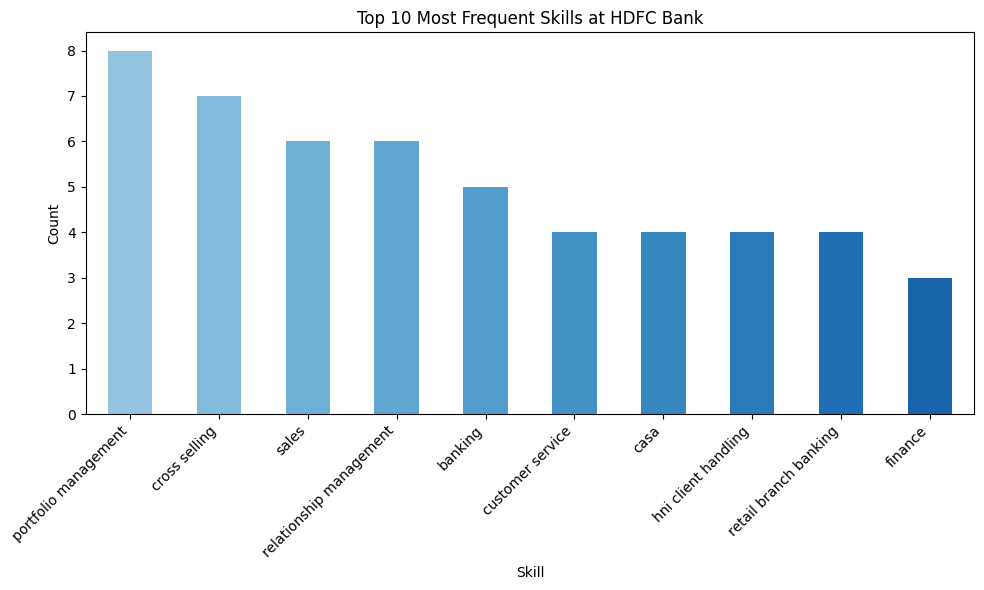

In [46]:
import matplotlib.pyplot as plt
import numpy as np  # For color mapping

# Filter for HDFC Bank and extract top 10 most frequent skills
top_skills_hdfc = df[df['company'] == 'Hdfc Bank']['resposibilities'] \
                    .str.lower().str.split(',').explode().value_counts().head(10)

# Generate a list of blue shades using a colormap
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_skills_hdfc)))

# Create the bar chart
plt.figure(figsize=(10, 6))
top_skills_hdfc.plot(kind='bar', color=colors)

plt.title('Top 10 Most Frequent Skills at HDFC Bank')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 3.4. Skiils needed to become DA

In [47]:
df[df['job_role'] == 'Data Scientist']['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

,count
resposibilities,
python,22
machine learning,17
tensorflow,9
data science,8
deep learning,7
analytics,6
data scientist,6
r,6
data analysis,5


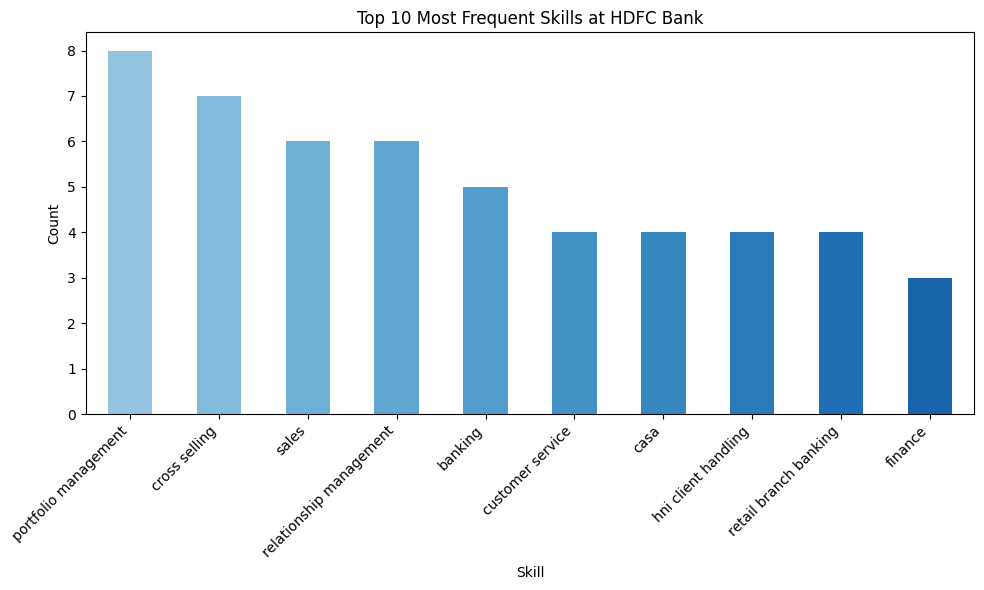

In [48]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for color mapping

# Filter responsibilities for HDFC Bank and extract top 10 skills
top_skills = df[df['company'] == 'Hdfc Bank']['resposibilities'] \
                .str.lower().str.split(',').explode().value_counts().head(10)

# Generate a list of blue shades using a colormap
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_skills)))  # Generate shades from a colormap

# Create the bar chart with Matplotlib and specify a list of colors
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar', color=colors)  # Use the 'colors' variable calculated with Matplotlib's colormap

plt.title('Top 10 Most Frequent Skills at HDFC Bank')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---

### 📊 Final Insights from Job Listings Dataset

- **Top Hiring Locations**: Most job opportunities are concentrated in tech hubs such as **Bangalore**, **Hyderabad**, and **Mumbai**.
- **Experience Requirements**:
  - Average minimum experience required: **~3 to 5 years**
  - Most roles target **mid-level professionals**.
- **Popular Employers**: Companies like **Accenture**, **HDFC Bank**, and **Mindtree** are among the top recruiters.
- **Most In-Demand Skills**: Based on job responsibilities, the top recurring skills include:
  - **Team Management**
  - **Customer Service**
  - **Sales**
  - **SQL**
  - **Business Analysis**
- **Company Ratings**:
  - Average rating across companies: **~4.0**
  - Indicates overall high employer satisfaction.
- **Reviews**:
  - Average number of company reviews: **~20,000–30,000**, suggesting well-established employers dominate the listings.

These insights can help job seekers align their skills with market demand and give recruiters a clearer picture of the competitive landscape.

---
